# 使用clesperanto进行仿射变换
这个notebook演示了如何对3D图像应用仿射变换。

In [1]:
import pyclesperanto_prototype as cle

cle.select_device('TX')

<NVIDIA GeForce GTX 1650 with Max-Q Design on Platform: NVIDIA CUDA (1 refs)>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread

In [3]:
# 加载示例数据
np_array = imread('../../data/Haase_MRT_tfl3d1.tif')
np_array.shape

(192, 256, 256)

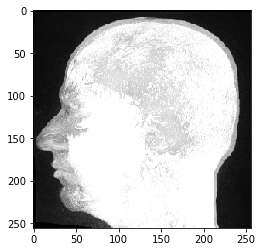

In [4]:
# 将其推送到GPU内存
input_image = cle.push_zyx(np_array)

cle.imshow(input_image)

## 旋转
要旋转图像，你需要提供对应于轴的角度。

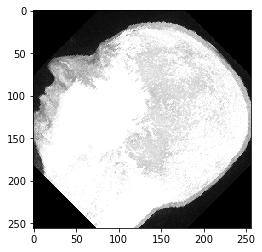

In [5]:
rotated = cle.rotate(input_image, angle_around_z_in_degrees=45)
cle.imshow(rotated)

默认情况下，图像围绕其中心旋转。你可以通过提供额外的参数来改变这一点。然后图像将围绕原点旋转。

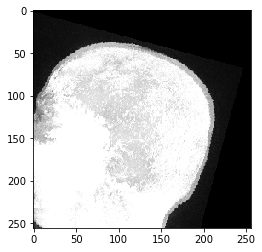

In [6]:
rotated = cle.rotate(input_image, angle_around_z_in_degrees=15, rotate_around_center=False)
cle.imshow(rotated)

## 平移
通过提供沿轴的平移距离可以平移图像：

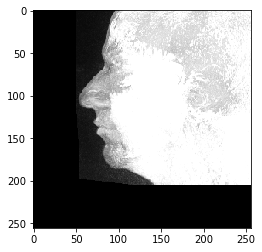

In [7]:
translated = cle.translate(input_image, translate_x=50, translate_y=-50)
cle.imshow(translated)

## 缩放
你可以通过提供缩放因子来缩放图像。

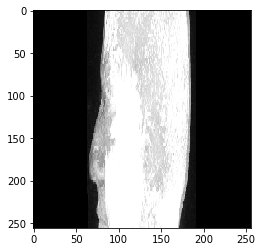

In [8]:
scaled = cle.scale(input_image, factor_x=0.5, factor_y=2)
cle.imshow(scaled)

在这种情况下，`auto_size`参数可能会很有用：

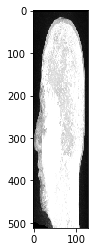

In [9]:
scaled_auto_size = cle.scale(input_image, factor_x=0.5, factor_y=2, auto_size=True)
cle.imshow(scaled_auto_size)

## 刚体变换
刚体变换允许一次性进行平移和旋转

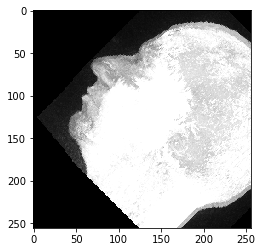

In [10]:
rigid_transformed = cle.rigid_transform(input_image, translate_x=50, angle_around_z_in_degrees=45)
cle.imshow(rigid_transformed)

## 仿射变换
要一次性进行平移、旋转、缩放和剪切，请使用仿射变换。

要设置仿射变换，你可以使用4x4变换矩阵：

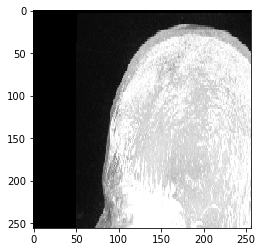

In [11]:
transform_matrix = np.asarray([
    [1, 0, 0, 50],
    [0, 2, 0, 0],
    [0, 0, 0.5, 0],
    [0, 0, 0, 1]
])
transformed_image = cle.affine_transform(input_image, transform=transform_matrix)
cle.imshow(transformed_image)

或者，你可以配置一个变换对象并传递它：

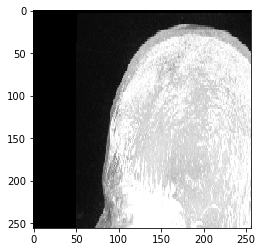

In [12]:
transform = cle.AffineTransform3D()
transform.translate(50)
transform.scale(1, 2, 0.5)

transformed_image = cle.affine_transform(input_image, transform=transform)
cle.imshow(transformed_image)

### 剪切
提供剪切角度将在所需平面上剪切图像

剪切是使用以下公式通过剪切角度计算的：

1.0/ tan(shear_angle_in_degrees * pi / 180)


yz


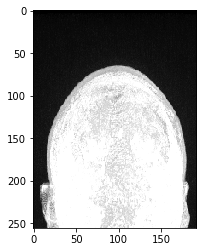

xz


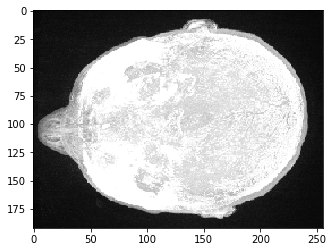

xy


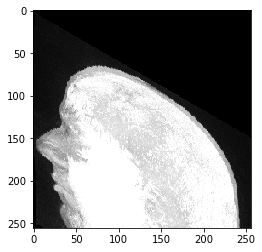

In [13]:
#例如，要在YZ平面上沿Y轴剪切图像，使用30度的剪切角度

shear_angle = 30.0

transform = cle.AffineTransform3D()
shear_transform= transform.shear_in_z_plane(angle_y_in_degrees=shear_angle)

transformed_image = cle.affine_transform(input_image, transform=shear_transform)

##在每个平面上显示图像
print("yz")
cle.imshow(cle.maximum_x_projection(transformed_image))
print("xz")
cle.imshow(cle.maximum_y_projection(transformed_image))
print("xy")
cle.imshow(cle.maximum_z_projection(transformed_image))

# 线性插值与最近邻插值
让我们裁剪鼻子并使用不同的插值模式对其进行变换。

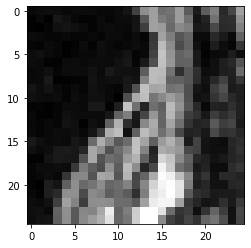

In [14]:
crop = input_image[50,125:150,45:70]

cle.imshow(crop)

# 最近邻插值

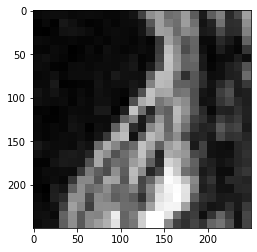

In [15]:
# 创建一个更大的图像
rescaled = cle.create(np.asarray(crop.shape) * 10)

# 用图像的缩放版本填充它；
cle.scale(crop, rescaled, factor_x=10, factor_y=10, factor_z=10, linear_interpolation=False)
cle.imshow(rescaled)

### 线性插值

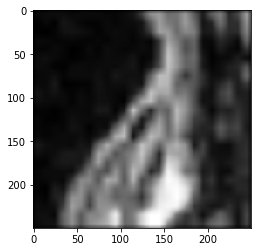

In [16]:
# 用图像的缩放版本填充它；
cle.scale(crop, rescaled, factor_x=10, factor_y=10, factor_z=10, linear_interpolation=True)
cle.imshow(rescaled)